In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W rozdziale tym skupimy się na następujących klasyfikacji SVM


Na końcu zaprezentowane zostaną metody łączenia wyników różnych klasyfikatorów (tzw. ensemblingu), w celu poprawy jakości klasyfikacji.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

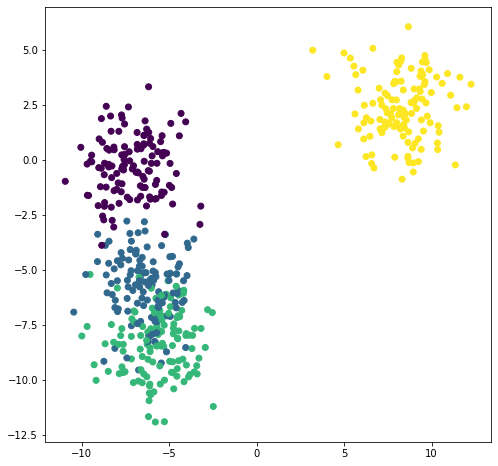

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=215)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### 2.4 SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, jest są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder nieliniowych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder nieliniowych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-6.155673,-0.983948,0
1,-5.689357,0.413477,0
2,-9.169257,0.372475,0
3,-6.659536,-3.537484,1
4,-6.467589,-5.681728,1
...,...,...,...
495,-5.530199,1.201727,0
496,-5.362059,-5.613621,1
497,-6.265704,-1.750414,0
498,-5.590039,-5.156901,1


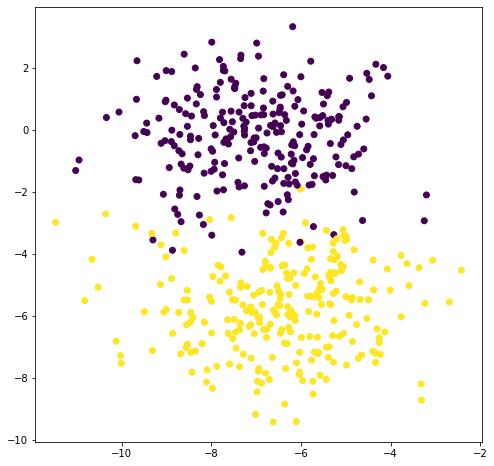

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=215)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

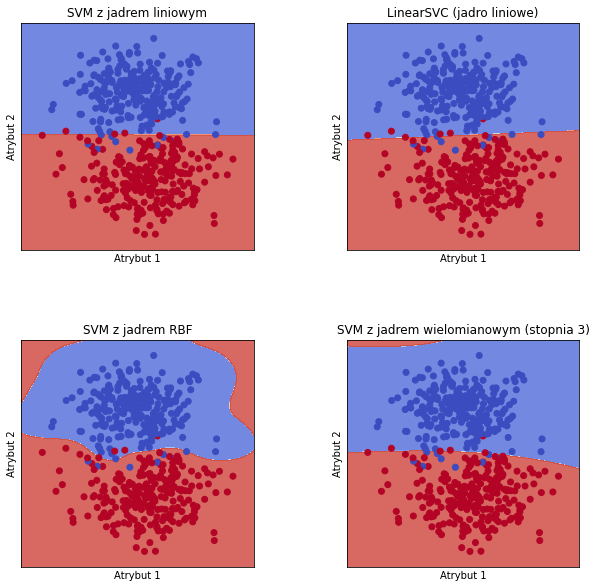

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

0.01
0.1
1
10
100
1000


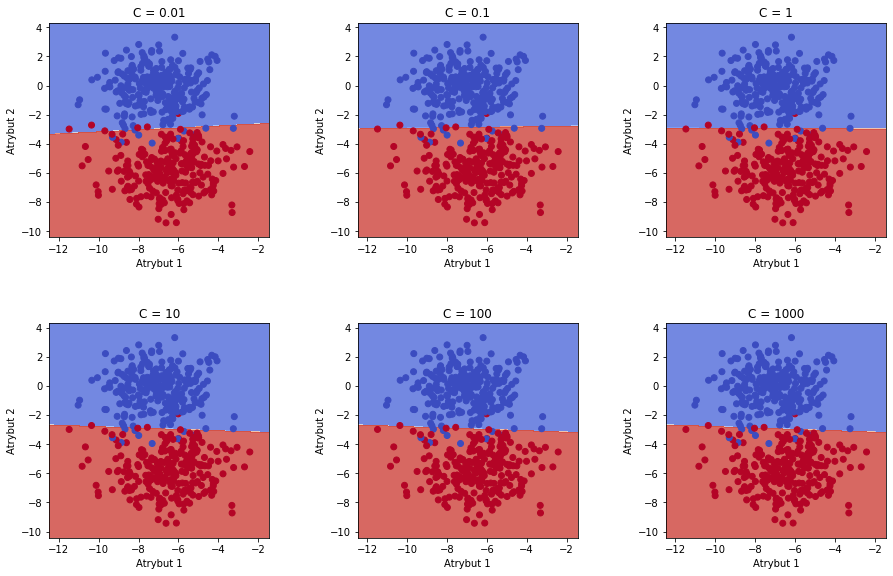

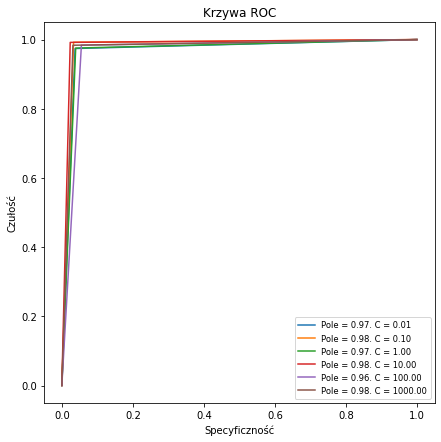

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

plt.figure(figsize=(15, 15))
titles = ['C = 0.01', 'C = 0.1', 'C = 1', 'C = 10', 'C = 100', 'C = 1000']
bias = []
variance = []

for i, C in enumerate([0.01, 0.1, 1, 10, 100, 1000]):
    svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
    print(C)
    x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
    y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.plot([0,1],[0,1], "k--", label='Przypadek pesymistyczny')
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])
    
plt.figure(figsize=(7, 7))
for i, C in enumerate([0.01, 0.1, 1, 10, 100, 1000]):

    kf = KFold(n_splits=2, shuffle = True)
    for train_index, test_index in kf.split(dane3):
        x_train, x_test = dane3[cechy].loc[train_index], dane3[cechy].loc[test_index]
        y_train, y_test = dane3['label'].loc[train_index], dane3['label'].loc[test_index]
    
    svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
    probas = svc.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc  = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='Pole = %0.2f. C = %0.2f' % (roc_auc, C))
plt.xlabel('Specyficzność')
plt.ylabel('Czułość')
plt.legend(loc=0, fontsize='small')
plt.title('Krzywa ROC')
plt.show()

In [50]:
parameters = {'C':[0.01, 0.1, 1, 10, 100, 1000]}
svc = svm.SVC(kernel = 'linear')
clf = GridSearchCV(svc, parameters)
clf.fit(dane3[cechy], dane3['label'])
print(clf.best_params_)

{'C': 1}


W przypadku wykorzystania jądra liniowego najlepszą wartością współczynnik regularyzcji jest 1.

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

0.01
0.1
1
10
100
1000


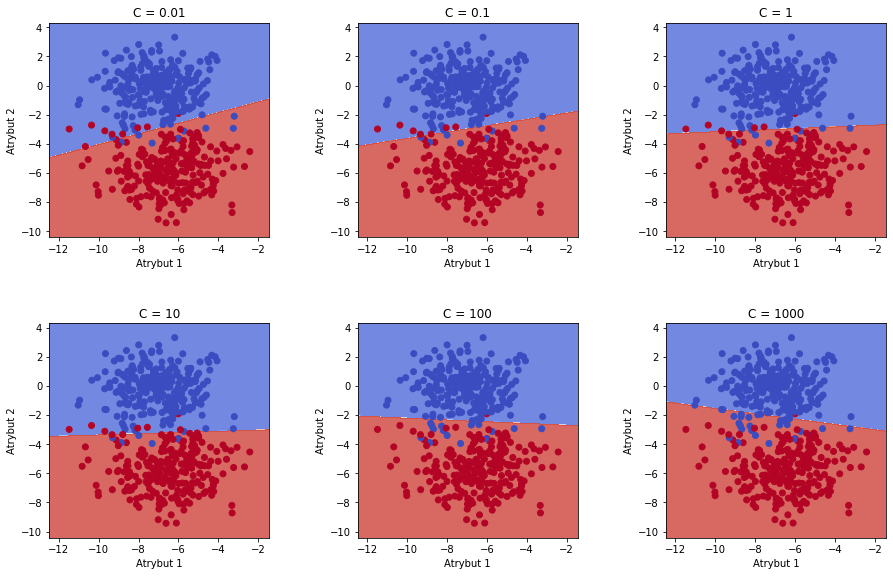

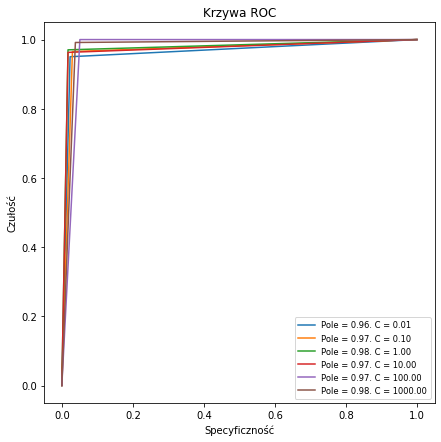

In [52]:
plt.figure(figsize=(15, 15))
titles = ['C = 0.01', 'C = 0.1', 'C = 1', 'C = 10', 'C = 100', 'C = 1000']
bias = []
variance = []

for i, C in enumerate([0.01, 0.1, 1, 10, 100, 1000]):
    lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])
    print(C)
    x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
    y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])

plt.figure(figsize=(7, 7))
for i, C in enumerate([0.01, 0.1, 1, 10, 100, 1000]):

    kf = KFold(n_splits=2, shuffle = True)
    for train_index, test_index in kf.split(dane3):
        x_train, x_test = dane3[cechy].loc[train_index], dane3[cechy].loc[test_index]
        y_train, y_test = dane3['label'].loc[train_index], dane3['label'].loc[test_index]
    
    lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])
    probas = lin_svc.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Pole = %0.2f. C = %0.2f' % (roc_auc, C))
plt.xlabel('Specyficzność')
plt.ylabel('Czułość')
plt.legend(loc=0, fontsize='small')
plt.title('Krzywa ROC')
plt.show()

In [51]:
parameters = {'C':[0.01, 0.1, 1, 10, 100, 1000]}
lin_svc = svm.LinearSVC()
clf = GridSearchCV(svc, parameters)
clf.fit(dane3[cechy], dane3['label'])
print(clf.best_params_)

{'C': 1}


Najlepszą wartością współczynnika regularyzacji jest również 1.

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

{'C': 1, 'degree': 2}


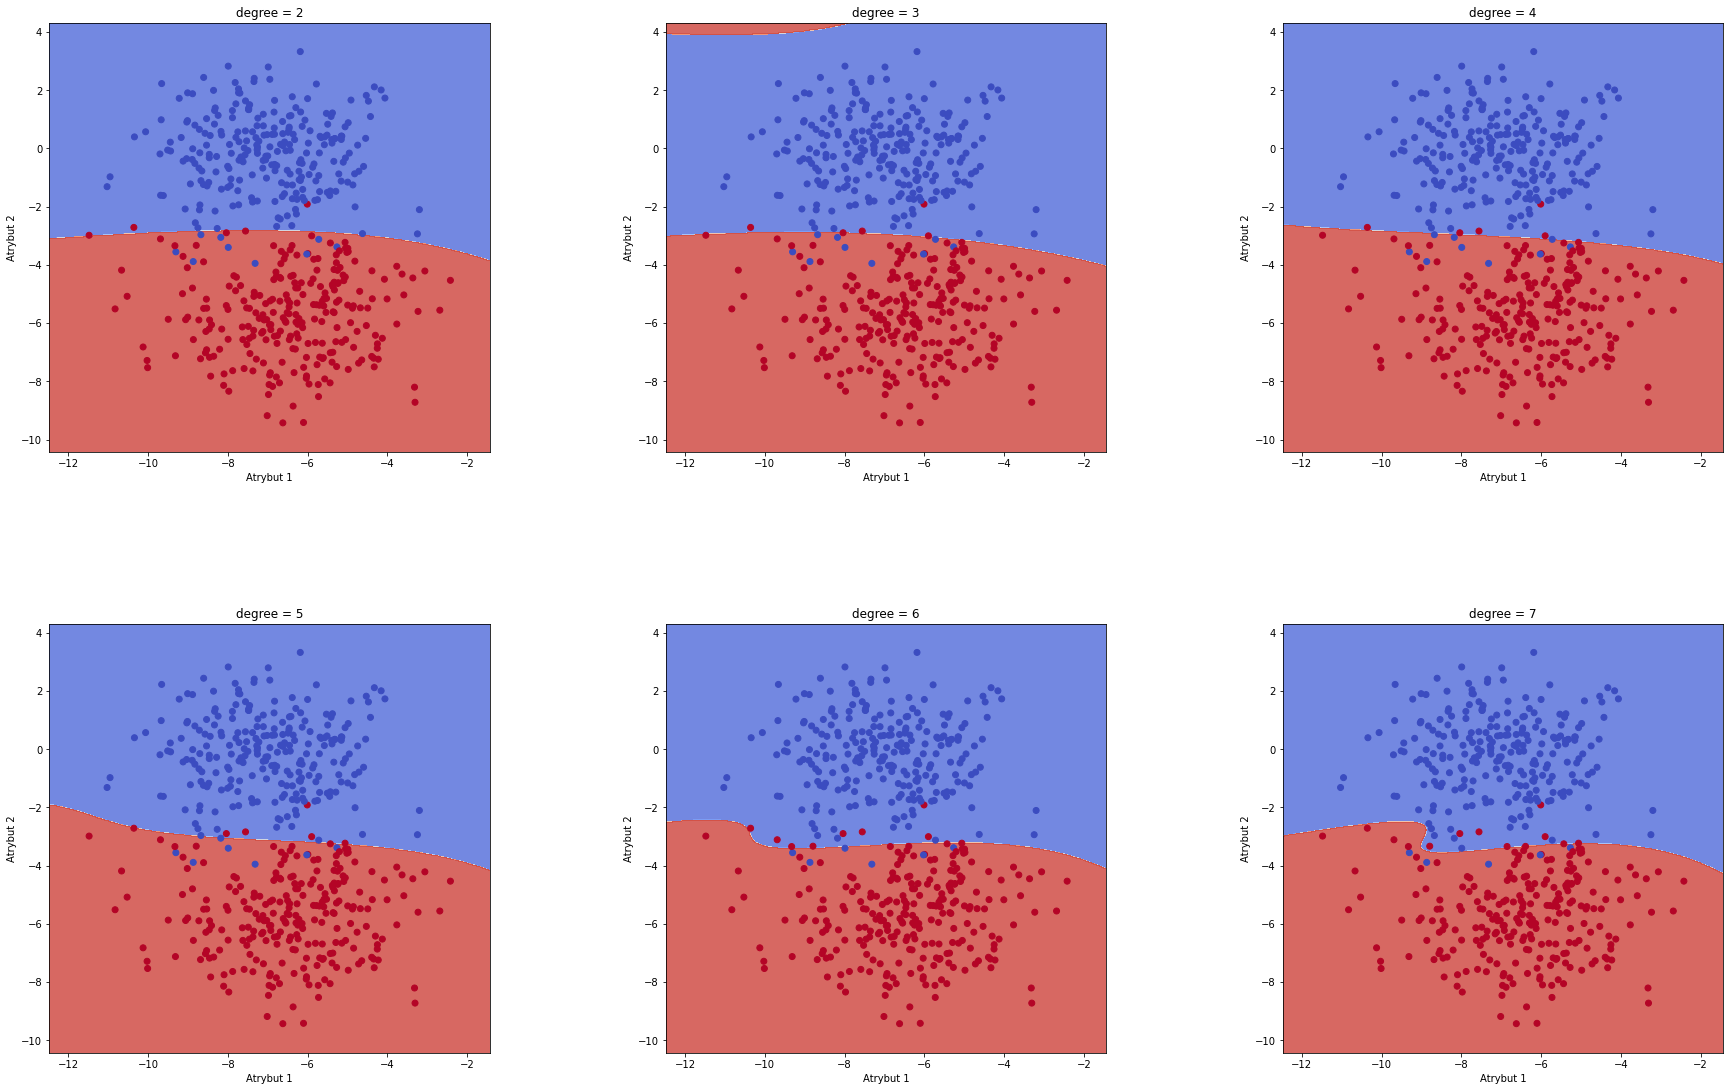

In [60]:
#Jako współczynnik regularyzacji przyjmuję współczynnik dobrany za pomocą LinearSVC

plt.figure(figsize=(30, 30))
titles = ['degree = 2', 'degree = 3', 'degree = 4', 'degree = 5', 'degree = 6', 'degree = 7']
bias = []
variance = []


for i, degree in enumerate([2, 3, 4, 5, 6, 7]):
    poly_svc = svm.SVC(kernel='poly', degree=degree, C=1).fit(dane3[cechy], dane3['label'])
    x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
    y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])

parameters = {'degree': [2, 3, 4, 5, 6, 7], 'C':[0.01, 0.1, 1, 10, 100, 1000]}
poly_svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(dane3[cechy], dane3['label'])
print(clf.best_params_)

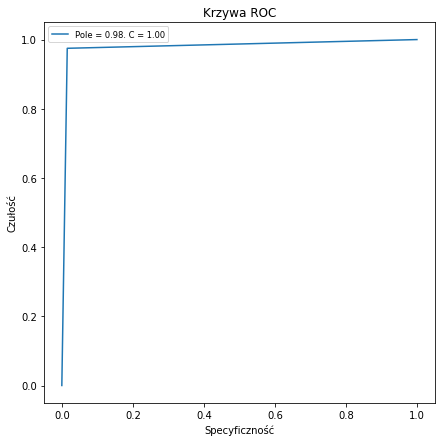

In [86]:
plt.figure(figsize=(7, 7))
kf = KFold(n_splits=2, shuffle = True)
for train_index, test_index in kf.split(dane3):
    x_train, x_test = dane3[cechy].loc[train_index], dane3[cechy].loc[test_index]
    y_train, y_test = dane3['label'].loc[train_index], dane3['label'].loc[test_index]
    
poly_svc = svm.SVC(C=1, degree = 2).fit(dane3[cechy], dane3['label'])
probas = poly_svc.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Pole = %0.2f. C = %0.2f' % (roc_auc, 1))
plt.xlabel('Specyficzność')
plt.ylabel('Czułość')
plt.legend(loc=0, fontsize='small')
plt.title('Krzywa ROC')
plt.show()

Najlepszym stopniem wielomianu jest 2 oraz C = 1.

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

0.01
0.1
0.5
0.7
1
1.5
2
3
{'gamma': 0.01}


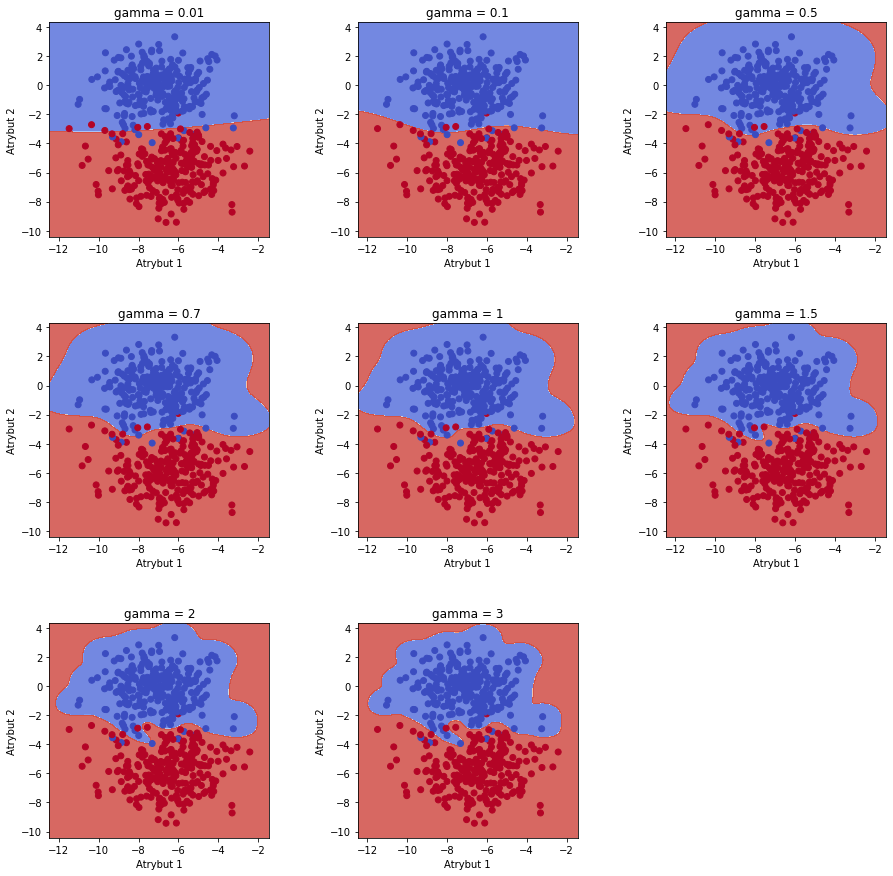

In [78]:
plt.figure(figsize=(15, 15))
titles = ['gamma = 0.01', 'gamma = 0.1', 'gamma = 0.5', 'gamma = 0.7', 'gamma = 1', 'gamma = 1.5', 'gamma = 2', 'gamma = 3']

for i, gamma in enumerate([0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 3]):
    rbf_svc = svm.SVC(kernel='rbf', gamma=gamma).fit(dane3[cechy], dane3['label'])
    print(gamma)
    x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
    y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])

parameters = {'gamma': [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 3]}
rbf_svc = svm.SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(dane3[cechy], dane3['label'])
print(clf.best_params_)


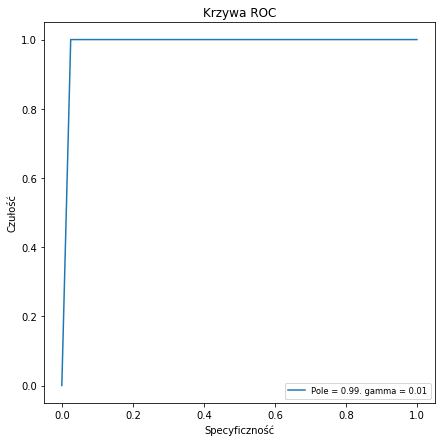

In [80]:
plt.figure(figsize=(7, 7))
kf = KFold(n_splits=2, shuffle = True)
for train_index, test_index in kf.split(dane3):
    x_train, x_test = dane3[cechy].loc[train_index], dane3[cechy].loc[test_index]
    y_train, y_test = dane3['label'].loc[train_index], dane3['label'].loc[test_index]
    
rbf_svc = svm.SVC(kernel='rbf', gamma=0.01).fit(dane3[cechy], dane3['label'])
probas = lin_svc.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Pole = %0.2f. gamma = %0.2f' % (roc_auc, 0.01))
plt.xlabel('Specyficzność')
plt.ylabel('Czułość')
plt.legend(loc=0, fontsize='small')
plt.title('Krzywa ROC')
plt.show()

Wybranym współczynnikiem wariancji jest 0.01.